In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/srees1988/predict-churn-py/main/customer_churn_data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# replace blanks with np.nan
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
# convert to float64
data['TotalCharges'] = data['TotalCharges'].astype('float64')

In [ ]:
import plotly.express as px

fig = px.scatter(x=data['tenure'], y=data['TotalCharges'],
                 color = data['Churn'], template = 'presentation',
                 opacity = 0.5, facet_col = data['Contract'],
                 title = 'Customer Churn by Tenure, Charges, and Contract Type',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Total Charges $'})

fig.show()

In [ ]:
#Checking missing values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
pip install pycaret


     |████████████████████████████████| 288 kB 7.7 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 86 kB 5.9 MB/s 
     |████████████████████████████████| 1.7 MB 48.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 113 kB 60.9 MB/s 
     |████████████████████████████████| 6.8 MB 56.9 MB/s 
     |████████████████████████████████| 261 kB 72.1 MB/s 
     |████████████████████████████████| 167 kB 47.5 MB/s 
     |████████████████████████████████| 1.3 MB 45.0 MB/s 
     |████████████████████████████████| 15.5 MB 51.6 MB/s 
     |████████████████████████████████| 2.0 MB 46.5 MB/s 
     |████████████████████████████████| 62 kB 928 kB/s 
     |████████████████████████████████| 10.1 MB 23.0 MB/s 
     |████████████████████████████████| 303 kB 41.8 MB/s 
     |██████████████████

In [ ]:
#init setup
from pycaret.classification import *
s = setup(data, target='Churn', ignore_features = ['customerID'])

,Description,Value
0,session_id,890
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7043, 21)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# compare all models
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8022,0.8428,0.5169,0.6571,0.5779,0.4514,0.4573,0.666
ada,Ada Boost Classifier,0.8039,0.8420,0.5215,0.6622,0.5829,0.4572,0.4631,0.246
lr,Logistic Regression,0.8089,0.8405,0.5493,0.6667,0.6015,0.4775,0.4819,0.389
lda,Linear Discriminant Analysis,0.7949,0.8329,0.5439,0.6278,0.5821,0.4473,0.4498,0.038
lightgbm,Light Gradient Boosting Machine,0.7931,0.8277,0.5138,0.6320,0.5663,0.4324,0.4368,0.151
nb,Naive Bayes,0.7410,0.8261,0.7696,0.5059,0.6103,0.4287,0.4499,0.019
rf,Random Forest Classifier,0.7925,0.8206,0.4815,0.6417,0.5496,0.4185,0.4261,0.771
et,Extra Trees Classifier,0.7757,0.7940,0.4730,0.5938,0.5260,0.3816,0.3862,0.760
knn,K Neighbors Classifier,0.7675,0.7398,0.4584,0.5744,0.5088,0.3593,0.3638,0.137
dt,Decision Tree Classifier,0.7276,0.6575,0.5038,0.4839,0.4930,0.3071,0.3076,0.038


In [ ]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=890, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
# tune best model
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7728,0.8075,0.4031,0.5977,0.4815,0.3430,0.3539
1,0.8073,0.8285,0.5039,0.6771,0.5778,0.4564,0.4648
2,0.8073,0.8711,0.5000,0.6842,0.5778,0.4568,0.4663
3,0.8215,0.8800,0.5154,0.7283,0.6036,0.4927,0.5050
4,0.8053,0.8417,0.4846,0.6848,0.5676,0.4466,0.4577
5,0.8032,0.8512,0.4615,0.6897,0.5530,0.4331,0.4475
6,0.8073,0.8418,0.4692,0.7011,0.5622,0.4448,0.4596
7,0.8195,0.8562,0.5308,0.7113,0.6079,0.4939,0.5028
8,0.7992,0.8460,0.4769,0.6667,0.5561,0.4309,0.4410
9,0.7951,0.8255,0.4923,0.6465,0.5590,0.4287,0.4354


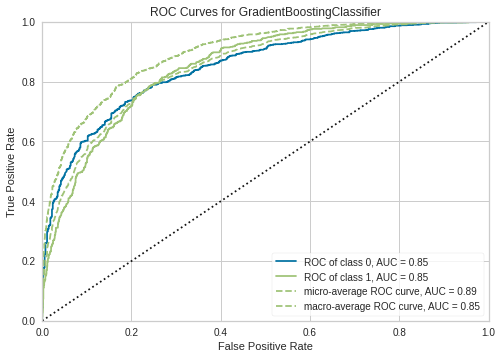

In [ ]:
# AUC Plot
plot_model(tuned_best_model, plot = 'auc')

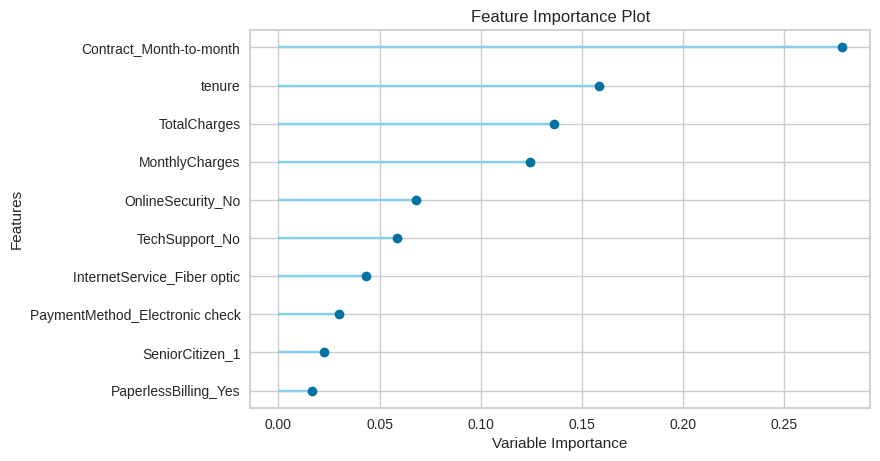

In [ ]:
# Feature Importance Plot
plot_model(tuned_best_model, plot = 'feature')

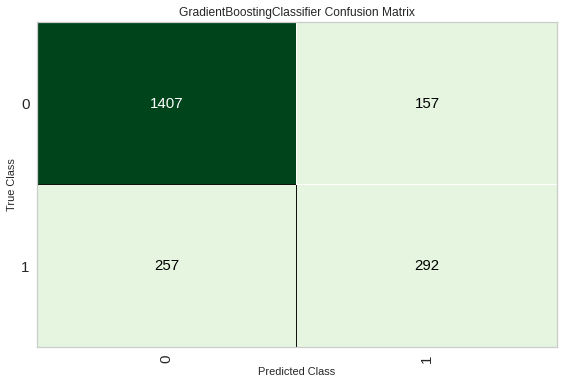

In [ ]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')

In [ ]:
def calculate_profit(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (5000-1000), 0)
    fp = np.where((y_pred==1) & (y==0), -1000, 0)
    return np.sum([tp,fp])# add metric to PyCaret
add_metric('profit', 'Profit', calculate_profit)

Name                                                        Profit
Display Name                                                Profit
Score Function       <function calculate_profit at 0x7f5141ffd560>
Scorer                               make_scorer(calculate_profit)
Target                                                        pred
Args                                                            {}
Greater is Better                                             True
Multiclass                                                    True
Custom                                                        True
Name: profit, dtype: object

In [ ]:
best_model = compare_models(sort='Profit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
nb,Naive Bayes,0.7339,0.8265,0.7765,0.5023,0.6094,0.4215,0.4453,308300.0,0.023
lightgbm,Light Gradient Boosting Machine,0.8030,0.8361,0.5455,0.6599,0.5962,0.4678,0.4721,250900.0,0.152
lda,Linear Discriminant Analysis,0.7953,0.8344,0.5530,0.6352,0.5901,0.4549,0.4575,250100.0,0.042
gbc,Gradient Boosting Classifier,0.8055,0.8465,0.5364,0.6708,0.5954,0.4697,0.4751,248500.0,0.666
lr,Logistic Regression,0.8010,0.8398,0.5402,0.6557,0.5908,0.4614,0.4660,247800.0,0.099
ada,Ada Boost Classifier,0.8024,0.8441,0.5280,0.6651,0.5879,0.4604,0.4662,243700.0,0.250
ridge,Ridge Classifier,0.7972,0.0000,0.5083,0.6559,0.5714,0.4417,0.4486,233300.0,0.020
qda,Quadratic Discriminant Analysis,0.5998,0.6438,0.7386,0.3775,0.4971,0.2216,0.2577,227200.0,0.027
rf,Random Forest Classifier,0.7915,0.8181,0.4932,0.6442,0.5579,0.4248,0.4317,224500.0,0.763
dt,Decision Tree Classifier,0.7375,0.6726,0.5318,0.5112,0.5203,0.3400,0.3408,213200.0,0.039


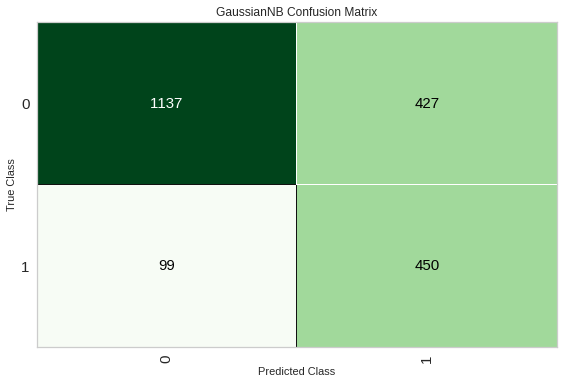

In [ ]:
plot_model(best_model, plot = 'confusion_matrix')